In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/cleaned/voitures_aramisauto_nettoye.csv')
print(df.head())

     Marque       Modèle  Année  Kilométrage      Etat     Prix  \
0  Mercedes     Classe A   2023       5245.0  Occasion  35999.0   
1   Peugeot          208   2023         20.0  Occasion  26999.0   
2      Opel        Mokka   2023       1675.0  Occasion  26799.0   
3    Toyota  YARIS CROSS   2022       5810.0  Occasion  24999.0   
4   Peugeot         2008   2024       8702.0  Occasion  23699.0   

  Type de Carburant Transmission  
0            Diesel        Auto.  
1        Électrique        Auto.  
2        Électrique        Auto.  
3           Hybride        Auto.  
4           Essence        Auto.  


#### Structure des données

- Nombre de lignes : 2300
- Nombre de colonnes : 8
- Marque (texte, 36 valeurs uniques)
- Modèle (texte, 219 valeurs uniques)
- Année (entier)
- Kilométrage (numérique flottant)
- Etat (texte, valeur unique)
- Prix (numérique flottant)

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marque             2298 non-null   object 
 1   Modèle             2298 non-null   object 
 2   Année              2298 non-null   int64  
 3   Kilométrage        2298 non-null   float64
 4   Etat               2298 non-null   object 
 5   Prix               2298 non-null   float64
 6   Type de Carburant  2298 non-null   object 
 7   Transmission       2298 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 143.8+ KB
None


In [3]:
print(df.describe())

             Année    Kilométrage          Prix
count  2298.000000    2298.000000   2298.000000
mean   2020.818538   47503.207572  20297.875109
std       2.218705   33788.542760   7267.559369
min    2012.000000       4.000000   6799.000000
25%    2019.000000   18951.250000  14624.000000
50%    2021.000000   41905.000000  18999.000000
75%    2023.000000   71129.750000  24674.000000
max    2024.000000  148069.000000  53399.000000


#### Observations initiales

1. Données complètes : Aucun champ n'a de valeurs manquantes.
2. Colonnes catégoriques :
- Les marques et modèles nécessitent une analyse groupée.
- La colonne Etat ne contient qu'une seule valeur, ce qui la rend peu informative pour cette EDA.
3. Colonnes numériques :
- Année, Kilométrage, et Prix semblent clés pour l'analyse.
- Le prix moyen est de 20,773€ avec une forte dispersion.

In [4]:
print(df["Marque"].unique())  
print(df["Modèle"].unique())  
print(df["Année"].unique())  
print(df["Kilométrage"].min(), df["Kilométrage"].max()) 
print(df["Etat"].unique()) 
print(df["Prix"].min(), df["Prix"].max())

['Mercedes' 'Peugeot' 'Opel' 'Toyota' 'Citroën' 'Volkswagen' 'Renault'
 'Dacia' 'BMW' 'Fiat' 'Tesla' 'Audi' 'Nissan' 'Hyundai' 'Ford' 'Cupra'
 'Kia' 'DS' 'MG' 'Seat' 'Mini' 'BYD' 'Jeep' 'Land' 'Skoda' 'Lynk&Co'
 'Lexus' 'Suzuki' 'Volvo' 'Honda' 'Mitsubishi' 'Infiniti' 'Mazda' 'Smart'
 'Alfa']
['Classe A' '208' 'Mokka' 'YARIS CROSS' '2008' '3008' 'C5 Aircross'
 'Golf 8' '308' 'C3' 'C-HR' 'Zoé' 'C4' 'Duster' 'Clio 5' 'C3 Aircross'
 'Série 1' 'Captur' '500' 'MODEL 3' 'A3 Sportback' 'Sandero' 'Austral'
 'Yaris 4' 'Qashqai' 'Twingo 3' 'T-Roc' 'A1 Sportback' '5008' 'Tucson'
 'Mégane 4' 'Tiguan' 'Corsa' 'CAPTUR' 'Yaris Cross' 'Arkana' 'Yaris'
 'Corolla Touring Sport' 'PUMA' 'Clio 4' 'Formentor' 'Puma' 'Sportage'
 'DS7 CROSSBACK' 'Polo' 'DS4' 'X1' 'Corolla' 'RAV 4' '308 SW' 'FORMENTOR'
 'Kadjar' 'DS3 Crossback' 'Berlingo' '408' 'MODEL Y' 'Q3 Sportback'
 'C4 Cactus' 'Aygo X' 'Crossland X' 'Kona' 'C5 X' 'ZS' 'Golf 7' 'SPRING'
 'Grand Scénic 4' '508' 'Ibiza' 'DS3 CROSSBACK' 'Classe C' 'Mini' 'Q2'

In [5]:
df_2022 = df[df["Année"] == 2022]
print(df_2022)

       Marque       Modèle  Année  Kilométrage      Etat     Prix  \
3      Toyota  YARIS CROSS   2022       5810.0  Occasion  24999.0   
7     Peugeot          208   2022       5737.0  Occasion  16999.0   
31    Peugeot          208   2022      57142.0  Occasion  15999.0   
38      Dacia       Duster   2022      26232.0  Occasion  21799.0   
40    Peugeot          308   2022      56306.0  Occasion  16999.0   
...       ...          ...    ...          ...       ...      ...   
2254       MG     MARVEL R   2022      19217.0  Occasion  30799.0   
2260      Kia          Rio   2022      28175.0  Occasion  15499.0   
2274    Skoda  Fabia Combi   2022      26359.0  Occasion  18499.0   
2279    Volvo         XC60   2022      65610.0  Occasion  36999.0   
2288    Skoda        Scala   2022      14920.0  Occasion  20999.0   

     Type de Carburant Transmission  
3              Hybride        Auto.  
7              Essence        Auto.  
31             Essence        Auto.  
38              Die

In [6]:
prix_moyen = df["Prix"].mean()
print(f"Prix moyen des voitures : {prix_moyen:.2f} euros")

Prix moyen des voitures : 20297.88 euros


In [7]:
kilometrage_moyen = df["Kilométrage"].mean()
print(f"Kilométrage moyen des voitures : {kilometrage_moyen:.2f} km")

Kilométrage moyen des voitures : 47503.21 km


Histogramme Empilé (Distribution des Années par Marque)

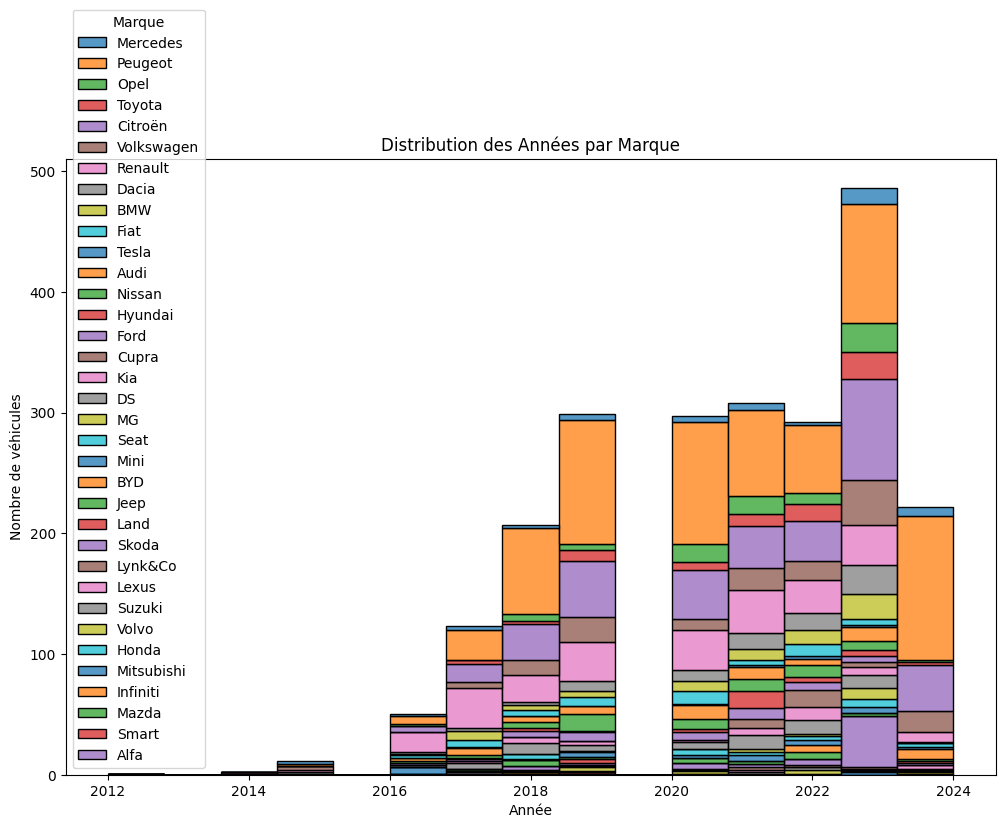

In [8]:

plt.figure(figsize=(12, 8))
sns.histplot(
    data=df,
    x="Année",
    hue="Marque",
    multiple="stack",
    palette="tab10",
    bins=15,
    kde=False,
)
plt.title("Distribution des Années par Marque")
plt.xlabel("Année")
plt.ylabel("Nombre de véhicules")
plt.show()

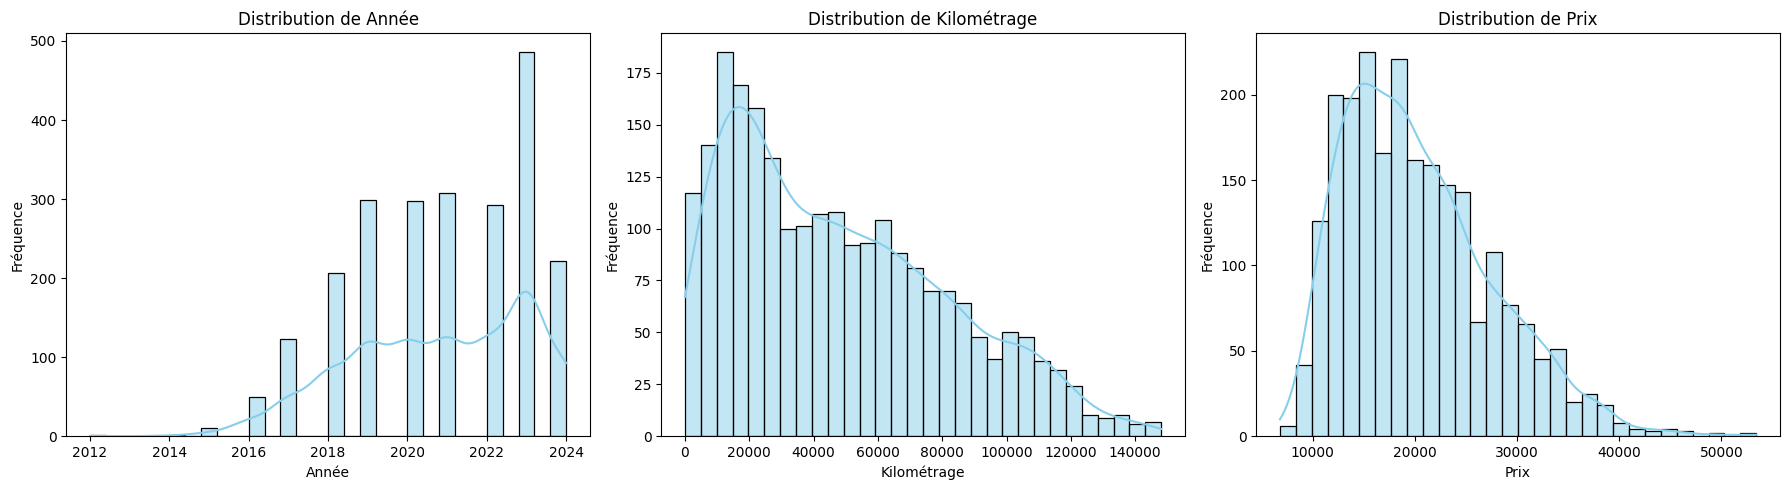

In [9]:
variables = ["Année", "Kilométrage", "Prix"]


fig, axes = plt.subplots(1, len(variables), figsize=(18, 5))

for ax, var in zip(axes, variables):
    sns.histplot(df[var], kde=True, bins=30, ax=ax, color="skyblue")
    ax.set_title(f"Distribution de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Fréquence")

plt.tight_layout()
plt.show()

Boxplot (distribution du Prix par Marque)

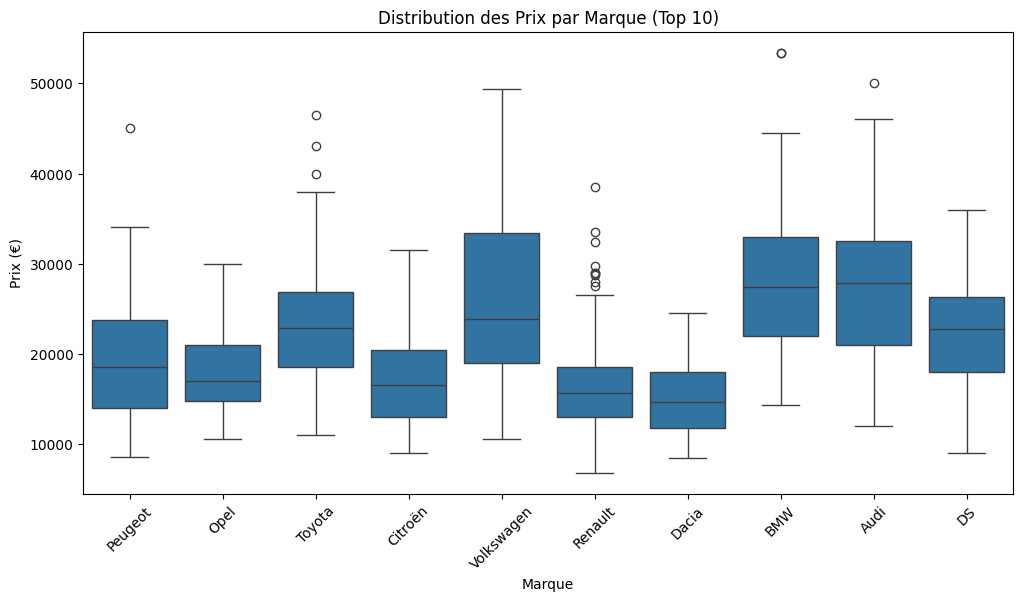

In [10]:
top_10_marques = df["Marque"].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["Marque"].isin(top_10_marques)], x="Marque", y="Prix")
plt.xticks(rotation=45)
plt.title("Distribution des Prix par Marque (Top 10)")
plt.xlabel("Marque")
plt.ylabel("Prix (€)")
plt.show()

Scatter Plot (relation entre deux variables avec une catégorisation par Marque)

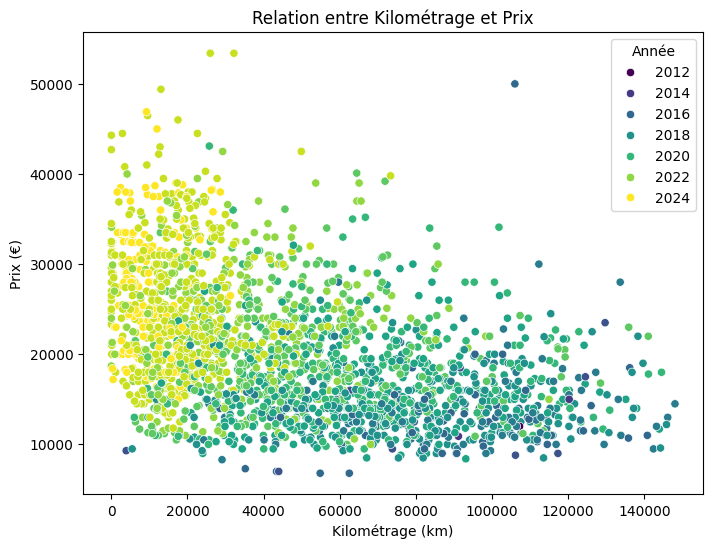

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Kilométrage", y="Prix", hue="Année", palette="viridis")
plt.title("Relation entre Kilométrage et Prix")
plt.xlabel("Kilométrage (km)")
plt.ylabel("Prix (€)")
plt.show()


###Clustering

   Kilométrage     Prix  Cluster
0       5245.0  35999.0        1
1         20.0  26999.0        1
2       1675.0  26799.0        1
3       5810.0  24999.0        1
4       8702.0  23699.0        1


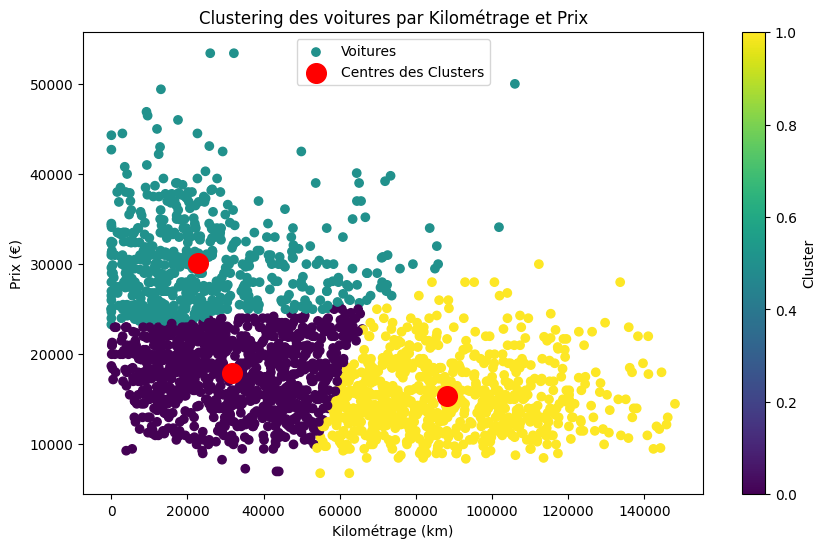

Centres des clusters (Kilométrage, Prix) :
[[31819.0908142  17928.69311065]
 [22705.36423841 30080.34271523]
 [88268.53532609 15353.67119565]]


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Sélectionner les colonnes pertinentes pour le clustering

# On utilise ici 'Kilométrage' et 'Prix' comme variables
X = df[["Kilométrage", "Prix"]]

# Normalisation des données en utilisant StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer le clustering K-Means avec 3 clusters (Kilométrage", "Prix", "Cluster)

'''

        Application l'algorithme K-Means en spécifiant le nombre de clusters 
        (ici, 3 clusters, mais vous pouvez ajuster ce nombre). 
        Le résultat du clustering est ajouté à la colonne 'Cluster' du DataFrame.

        '''

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Affichage des 3 clusters
print(df[["Kilométrage", "Prix", "Cluster"]].head())

# Visualisation des clusters
''' 
    Graphique de dispersion où chaque point est coloré en fonction de son cluster
    
'''

plt.figure(figsize=(10, 6))


plt.scatter(
    df["Kilométrage"], df["Prix"], c=df["Cluster"], cmap="viridis", label="Voitures")

# Ajouter les centres des clusters sur le graphique
centerpoints = kmeans.cluster_centers_
centerpoints = scaler.inverse_transform(centerpoints)  # Revenir à l'échelle d'origine des données

# Tracer les centres des clusters
plt.scatter(
    centerpoints[:, 0],
    centerpoints[:, 1],
    c="red",
    marker="o",
    s=200,
    label="Centres des Clusters",
)

plt.title("Clustering des voitures par Kilométrage et Prix")
plt.xlabel("Kilométrage (km)")
plt.ylabel("Prix (€)")
plt.colorbar(label="Cluster")
plt.legend()


plt.show()


# Revenir à l'échelle d'origine des données
print("Centres des clusters (Kilométrage, Prix) :")
print(centerpoints)

### Interprétation des clusters
- Clusters violet : Ce cluster contient des voitures récentes avec un faible kilométrage et un prix bas.
- Cluster jaune : Ce cluster contient des voitures chères avec un kilométrage élevé.
- Cluster 3 (par exemple, le groupe bleu) : Ce cluster pourrait inclure des voitures à prix moyen et kilométrage moyen, avec des points situés dans la partie médiane du graphique.

Pairplot (relations entre toutes les variables numériques)

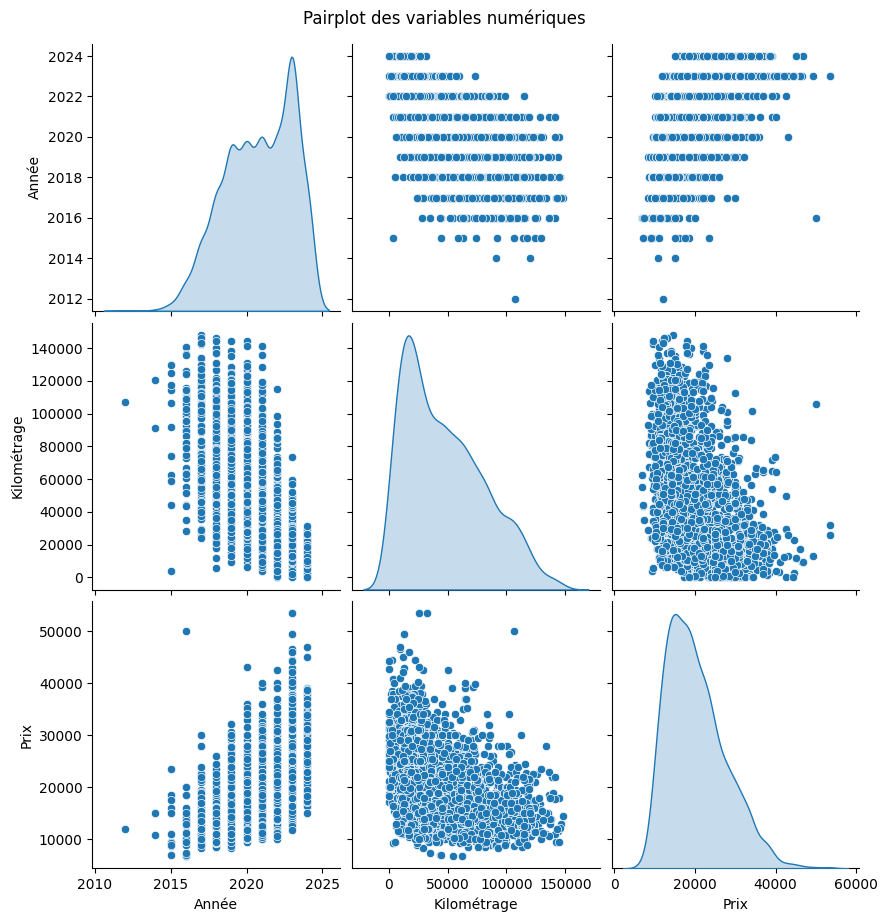

In [13]:
sns.pairplot(df, vars=["Année", "Kilométrage", "Prix"], diag_kind="kde", height=3)
plt.suptitle("Pairplot des variables numériques", y=1.02)
plt.show()

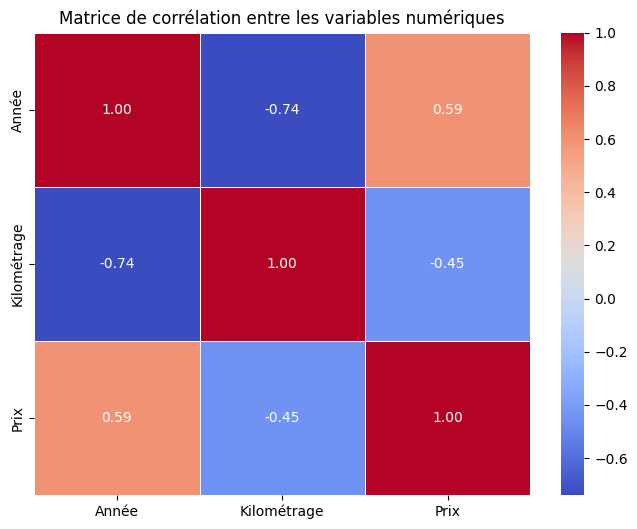

In [14]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = numeric_df.corr()

# Visualiser la matrice de corrélation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()


#### Explication :

1. ``df.corr()`` : Calcule les coefficients de corrélation entre les colonnes **numériques** uniquement. Cela permet d'identifier les relations linéaires entre les différentes variables quantitatives du DataFrame.

2. ``sns.heatmap`` : Utilisé pour visualiser les corrélations sous forme de matrice, en utilisant des couleurs pour indiquer l'intensité des relations (positives, négatives ou nulles).

3. Options clés dans heatmap :
   - ``annot=True`` : Affiche les valeurs numériques des corrélations directement sur la carte thermique.
   - ``cmap='coolwarm'`` : Utilise une palette de couleurs qui va du bleu (corrélations négatives) au rouge (corrélations positives) pour mieux interpréter l'intensité des relations.
   - ``fmt=".2f"`` : Formate les valeurs affichées avec **2 décimales** pour plus de lisibilité.

Scatter Plot (relation entre deux variables avec une catégorisation par Marque)

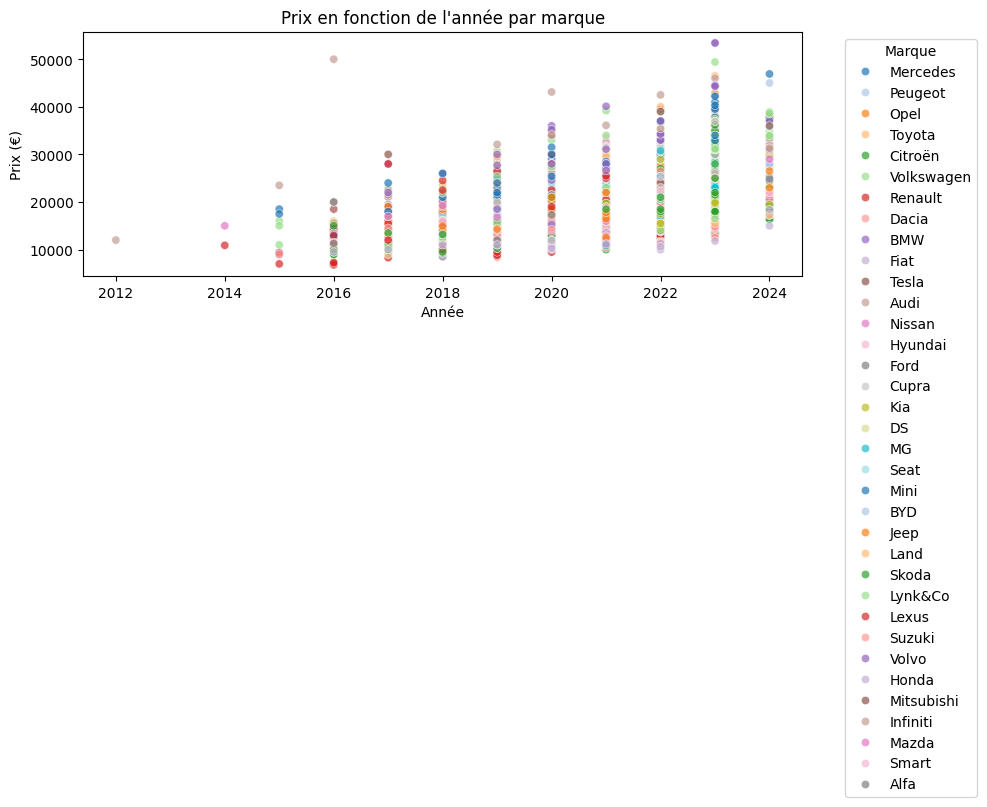

In [15]:
# Scatter plot Année vs Prix, coloré par Marque
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Année", y="Prix", hue="Marque", alpha=0.7, palette="tab20")
plt.title("Prix en fonction de l'année par marque")
plt.xlabel("Année")
plt.ylabel("Prix (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Marque")
plt.tight_layout()
plt.show()

 Violin Plot (relation entre Kilométrage et Année)

/var/folders/th/h6d9rz1s3ybdd_wzltc58xf40000gn/T/ipykernel_53812/1251588172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Année", y="Kilométrage", palette="muted", scale="width")
/var/folders/th/h6d9rz1s3ybdd_wzltc58xf40000gn/T/ipykernel_53812/1251588172.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x="Année", y="Kilométrage", palette="muted", scale="width")


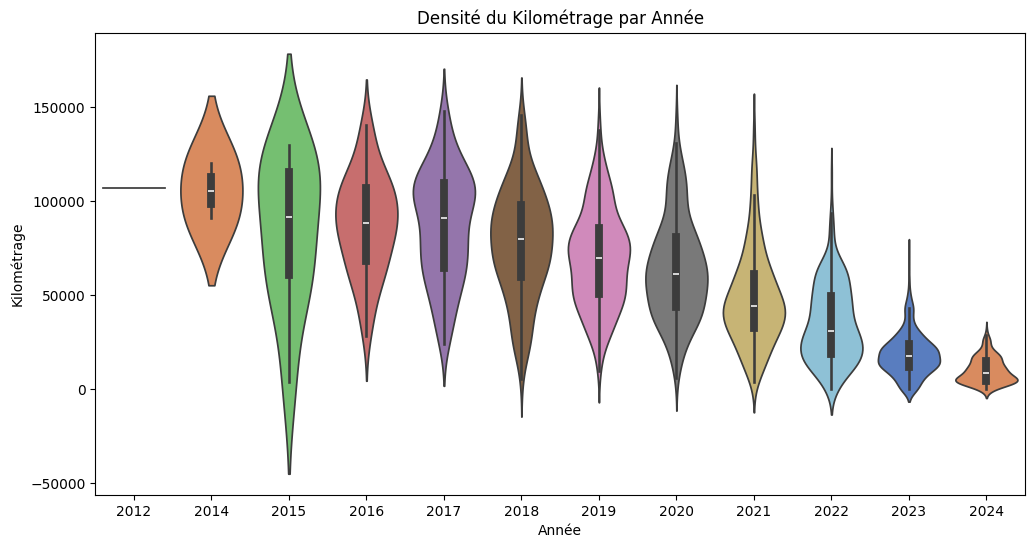

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Année", y="Kilométrage", palette="muted", scale="width")
plt.title("Densité du Kilométrage par Année")
plt.xlabel("Année")
plt.ylabel("Kilométrage")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [18]:
X = df[['Kilométrage', 'Année']]
y = df['Prix']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [20]:
X_train

,Kilométrage,Année
1131,17482.0,2024
351,101650.0,2019
944,29000.0,2020
1958,13745.0,2023
210,50850.0,2023
...,...,...
1638,3079.0,2023
1095,36450.0,2021
1130,17285.0,2020
1294,43390.0,2016


In [21]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")

Erreur quadratique moyenne (MSE) : 33698578.654320635
Coefficient de détermination (R²) : 0.3081216770978985


In [22]:
threshold = df['Prix'].median()
df['Prix_binaire'] = (df['Prix'] > threshold).astype(int)

In [23]:
y_logistic = df['Prix_binaire']

X_train, X_test, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test)

In [25]:
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
classification_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

In [26]:
print(f"Régression linéaire :\nMSE : {mse}\nR² : {r2}")
print("\nRégression logistique :")
print(f"Accuracy : {accuracy_logistic}")
print("Rapport de classification :\n", classification_report_logistic)

Régression linéaire :
MSE : 33698578.654320635
R² : 0.3081216770978985

Régression logistique :
Accuracy : 0.658695652173913
Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       248
           1       0.62      0.68      0.65       212

    accuracy                           0.66       460
   macro avg       0.66      0.66      0.66       460
weighted avg       0.66      0.66      0.66       460



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Charger les données
df = pd.read_csv('../data/cleaned/voitures_aramisauto_nettoye.csv')

# Afficher les premières lignes pour vérifier
df.head()


,Marque,Modèle,Année,Kilométrage,Etat,Prix,Type de Carburant,Transmission
0,Mercedes,Classe A,2023,5245.0,Occasion,35999.0,Diesel,Auto.
1,Peugeot,208,2023,20.0,Occasion,26999.0,Électrique,Auto.
2,Opel,Mokka,2023,1675.0,Occasion,26799.0,Électrique,Auto.
3,Toyota,YARIS CROSS,2022,5810.0,Occasion,24999.0,Hybride,Auto.
4,Peugeot,2008,2024,8702.0,Occasion,23699.0,Essence,Auto.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marque             2298 non-null   object 
 1   Modèle             2298 non-null   object 
 2   Année              2298 non-null   int64  
 3   Kilométrage        2298 non-null   float64
 4   Etat               2298 non-null   object 
 5   Prix               2298 non-null   float64
 6   Type de Carburant  2298 non-null   object 
 7   Transmission       2298 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 143.8+ KB
None
             Année    Kilométrage          Prix
count  2298.000000    2298.000000   2298.000000
mean   2020.818538   47503.207572  20297.875109
std       2.218705   33788.542760   7267.559369
min    2012.000000       4.000000   6799.000000
25%    2019.000000   18951.250000  14624.000000
50%    2021.000000   41905.000000  18999.000000
75%    20

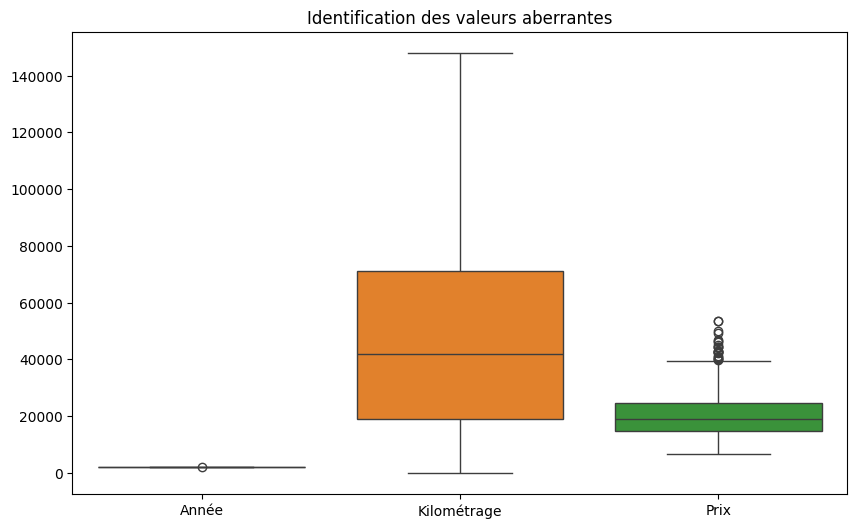

In [98]:
# Analyser les caractéristiques des données
print(df.info())
print(df.describe())

# Visualiser les valeurs aberrantes dans les colonnes numériques
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Identification des valeurs aberrantes")
plt.show()

In [99]:
# Vérifier les colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns

# Appliquer One-Hot Encoding sur les colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Vérifier le DataFrame après encodage
df_encoded.head()

,Année,Kilométrage,Prix,Marque_Audi,Marque_BMW,Marque_BYD,Marque_Citroën,Marque_Cupra,Marque_DS,Marque_Dacia,...,Modèle_ZS,Modèle_Zoé,Modèle_i20,Modèle_i30,Type de Carburant_Essence,Type de Carburant_Hybride,Type de Carburant_Micro-hybride,Type de Carburant_Non spécifié,Type de Carburant_Électrique,Transmission_Manuelle
0,2023,5245.0,35999.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023,20.0,26999.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2023,1675.0,26799.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2022,5810.0,24999.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2024,8702.0,23699.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [100]:
# Ajouter la variable binaire 'Prix_binaire'
threshold = df['Prix'].median()
df_encoded['Prix_binaire'] = (df['Prix'] > threshold).astype(int)

# Vérifier les valeurs uniques de 'Prix_binaire' pour s'assurer que c'est bien binaire
print(df_encoded['Prix_binaire'].unique())

[1 0]


In [101]:
# Appliquer une transformation logarithmique sur le prix et le kilométrage
df_encoded['Prix_log'] = np.log1p(df_encoded['Prix'])
df_encoded['Kilométrage_log'] = np.log1p(df_encoded['Kilométrage'])

# Vérifier les premières lignes après la transformation
df_encoded[['Prix', 'Prix_log', 'Kilométrage', 'Kilométrage_log']].head()

,Prix,Prix_log,Kilométrage,Kilométrage_log
0,35999.0,10.491274,5245.0,8.565221
1,26999.0,10.203592,20.0,3.044522
2,26799.0,10.196157,1675.0,7.424165
3,24999.0,10.126631,5810.0,8.667508
4,23699.0,10.073230,8702.0,9.071423


In [102]:
# Standardiser les colonnes numériques
scaler = RobustScaler()
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop(['Prix_binaire', 'Prix'])
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Vérifier les premières lignes après la standardisation
df_encoded.head()

,Année,Kilométrage,Prix,Marque_Audi,Marque_BMW,Marque_BYD,Marque_Citroën,Marque_Cupra,Marque_DS,Marque_Dacia,...,Modèle_i30,Type de Carburant_Essence,Type de Carburant_Hybride,Type de Carburant_Micro-hybride,Type de Carburant_Non spécifié,Type de Carburant_Électrique,Transmission_Manuelle,Prix_binaire,Prix_log,Kilométrage_log
0,0.50,-0.702588,35999.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,1.221808,-1.571123
1,0.50,-0.802725,26999.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,1,0.671810,-5.745258
2,0.50,-0.771007,26799.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,1,0.657596,-2.433862
3,0.25,-0.691760,24999.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,1,0.524675,-1.493785
4,0.75,-0.636335,23699.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,1,0.422582,-1.188390


In [103]:
# Préparer les données pour la sélection de caractéristiques
X_linear = df_encoded.drop(columns=['Prix', 'Prix_binaire', 'Prix_log'])
y_linear = df_encoded['Prix_log']

# Utiliser SelectKBest pour sélectionner les meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k=10)
X_linear_selected = selector.fit_transform(X_linear, y_linear)
selected_features = X_linear.columns[selector.get_support()]

# Afficher les caractéristiques sélectionnées
print("Selected Features:", selected_features)

Selected Features: Index(['Année', 'Kilométrage', 'Marque_Renault', 'Modèle_C3', 'Modèle_Golf 8',
       'Type de Carburant_Essence', 'Type de Carburant_Hybride',
       'Type de Carburant_Micro-hybride', 'Transmission_Manuelle',
       'Kilométrage_log'],
      dtype='object')


In [104]:
# Diviser les données en ensembles d'entraînement et de test
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear_selected, y_linear, test_size=0.2, random_state=42)

In [105]:
# Entraîner le modèle de régression linéaire
model_linear = LinearRegression()
model_linear.fit(X_train_linear, y_train_linear)
y_pred_linear = model_linear.predict(X_test_linear)

# Évaluer le modèle en revenant à l'échelle d'origine
mse = mean_squared_error(np.expm1(y_test_linear), np.expm1(y_pred_linear))
r2 = r2_score(np.expm1(y_test_linear), np.expm1(y_pred_linear))
print("Régression Linéaire :")
print(f"MSE : {mse:.2f}")
print(f"R² : {r2:.2f}")

Régression Linéaire :
MSE : 0.32
R² : 0.53


In [106]:
# Préparation des données pour la régression logistique
X_logistic = df_encoded.drop(columns=['Prix', 'Prix_binaire', 'Prix_log'])
y_logistic = df_encoded['Prix_binaire']

# Diviser les données en ensembles d'entraînement et de test
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [107]:
# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Évaluer le modèle de régression logistique
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
classification_report_logistic = classification_report(y_test_logistic, y_pred_logistic)
print("\nRégression Logistique :")
print(f"Accuracy : {accuracy_logistic:.2f}")
print("Rapport de classification :")
print(classification_report_logistic)


Régression Logistique :
Accuracy : 0.92
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       248
           1       0.93      0.90      0.91       212

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460

